## Exploratory Data Analysis

### Purpose: eda.ipynb is provided to ease the replication of the analytics given in the paper.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import rcParams

rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['font.size'] = 8
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  

# Add the parent directory of the src folder to the system path temporarily
# The change to sys.path is only for the current running instance of the notebook.
# This will allow the .ipynb file to import Python modules from another directories.
sys.path.append(os.path.abspath("../src"))

from dynamics import *
from simul import *
from utils import *
from optimize import *

# Get parent directory to access to config.yaml file.
path = os.getcwd()
pardir = os.path.abspath(os.path.join(path, os.pardir)) # gets parent directory

config_file = "configs/config.yaml" # Bring config.yaml file.
base_config = load_config(os.path.join(pardir,config_file)) # the parameter is the name (and the path if the file isn't in the current working directory) of the file.

### The config.yaml has parameter information of how simulation data will be generated and preprocessed.

### In this notebook, we will plot the phase portrait of three dynamical systems: cubic nonlinear dynamics, undamped pendulum, and undamped Duffing system.

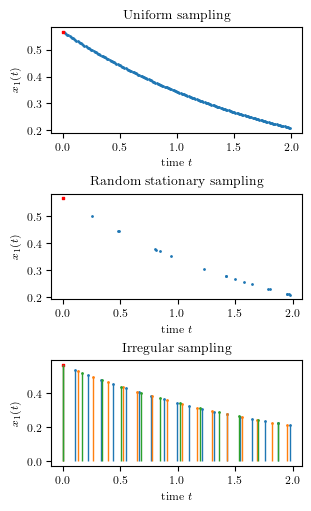

In [2]:
# Generate a data of uniform sampling time t=0.01
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.01
base_config["params_synthetic_data"]["randomness"] = False
uniform_observation_t001 = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])

# Generate a data of random stationary sampling time t=0.1
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.1
base_config["params_synthetic_data"]["randomness"] = True
random_observation_t01 = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])

# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])

observation_list = [uniform_observation_t001[0], random_observation_t01[0], irregular_observation[0]]
observation_time_list = [uniform_observation_t001[1], random_observation_t01[1], irregular_observation[1]]
fig_label = ["Uniform sampling","Random stationary sampling","Irregular sampling"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 5),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    temp_time = observation_time_list[i]

    if fig_label[i] == "Irregular sampling":
        integer_list = (temp_time[0]*100).astype(np.int64)
        sensor1_idx = np.isclose(integer_list % 11, 0, atol=10**-8)
        sensor2_idx = np.isclose(integer_list % 13, 0, atol=10**-8)
        sensor3_idx = np.isclose(integer_list % 17, 0, atol=10**-8)

        ax.scatter(x=temp_time[0][sensor1_idx], y=temp_data[0][sensor1_idx,0], s=1, c='tab:blue',)
        ax.scatter(x=temp_time[0][sensor2_idx], y=temp_data[0][sensor2_idx,0], s=1, c='tab:orange')
        ax.scatter(x=temp_time[0][sensor3_idx], y=temp_data[0][sensor3_idx,0], s=1, c='tab:green')

        ax.vlines(temp_time[0][sensor1_idx], 0, temp_data[0][sensor1_idx,0], colors="tab:blue", linewidth=1, label="sensor 1")
        ax.vlines(temp_time[0][sensor2_idx], 0, temp_data[0][sensor2_idx,0], colors="tab:orange", linewidth=1, label="sensor 2")
        ax.vlines(temp_time[0][sensor3_idx], 0, temp_data[0][sensor3_idx,0], colors="tab:green", linewidth=1, label="sensor 3")
        #ax.legend(loc="lower left", fontsize = 7)
    else:
        ax.scatter(x=temp_time[0], y=temp_data[0][:,0], s=1, c='tab:blue')

    ax.scatter(temp_time[0][0],temp_data[0][0,0], s=3, color='red', marker="s")

    ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
    ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
    ax.set_title(f"{fig_label[i]}")
    ax.set_xlabel("time $t$", fontsize=8)
    ax.set_ylabel("$x_1(t)$", fontsize=8)
    
# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='$(x_1(t),x_2(t))$', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
# fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("NL_ODE_seed_12.png", dpi=300, bbox_inches='tight')
plt.show()

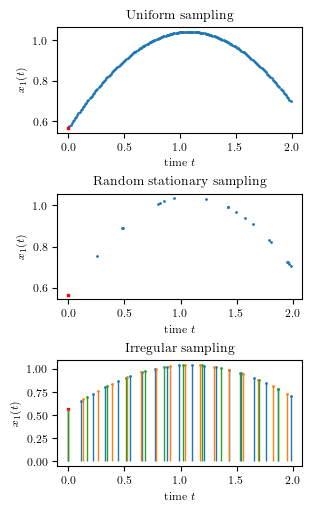

In [3]:
# Generate a data of uniform sampling time t=0.01
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.01
base_config["params_synthetic_data"]["randomness"] = False
uniform_observation_t001 = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])


# Generate a data of random stationary sampling time t=0.1
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.1
base_config["params_synthetic_data"]["randomness"] = True
random_observation_t01 = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])

# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])

observation_list = [uniform_observation_t001[0], random_observation_t01[0], irregular_observation[0]]
observation_time_list = [uniform_observation_t001[1], random_observation_t01[1], irregular_observation[1]]
fig_label = ["Uniform sampling","Random stationary sampling","Irregular sampling"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 5),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    temp_time = observation_time_list[i]

    if fig_label[i] == "Irregular sampling":
        integer_list = (temp_time[0]*100).astype(np.int64)
        sensor1_idx = np.isclose(integer_list % 11, 0, atol=10**-8)
        sensor2_idx = np.isclose(integer_list % 13, 0, atol=10**-8)
        sensor3_idx = np.isclose(integer_list % 17, 0, atol=10**-8)

        ax.scatter(x=temp_time[0][sensor1_idx], y=temp_data[0][sensor1_idx,0], s=1, c='tab:blue',)
        ax.scatter(x=temp_time[0][sensor2_idx], y=temp_data[0][sensor2_idx,0], s=1, c='tab:orange')
        ax.scatter(x=temp_time[0][sensor3_idx], y=temp_data[0][sensor3_idx,0], s=1, c='tab:green')

        ax.vlines(temp_time[0][sensor1_idx], 0, temp_data[0][sensor1_idx,0], colors="tab:blue", linewidth=1, label="sensor 1")
        ax.vlines(temp_time[0][sensor2_idx], 0, temp_data[0][sensor2_idx,0], colors="tab:orange", linewidth=1, label="sensor 2")
        ax.vlines(temp_time[0][sensor3_idx], 0, temp_data[0][sensor3_idx,0], colors="tab:green", linewidth=1, label="sensor 3")

    else:
        ax.scatter(x=temp_time[0], y=temp_data[0][:,0], s=1, c='tab:blue')

    ax.scatter(temp_time[0][0],temp_data[0][0,0], s=3, color='red', marker="s")

    ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
    ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
    ax.set_title(f"{fig_label[i]}")
    ax.set_xlabel("time $t$", fontsize=8)
    ax.set_ylabel("$x_1(t)$", fontsize=8)

# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='$(x_1(t),x_2(t))$', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
# fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("Pendulum_seed12.png", dpi=300, bbox_inches='tight')
plt.show()

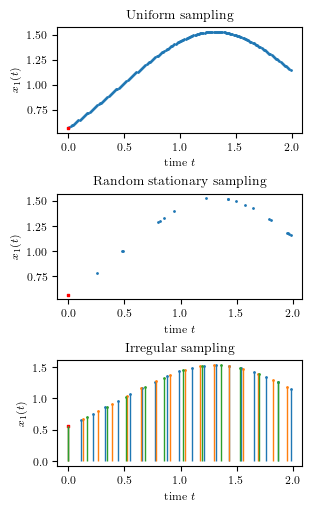

In [4]:
# Generate a data of uniform sampling time t=0.01
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.01
base_config["params_synthetic_data"]["randomness"] = False
uniform_observation_t001 = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

# Generate a data of random stationary sampling time t=0.1
base_config["params_synthetic_data"]["TIME_INTERVAL"] = 0.1
base_config["params_synthetic_data"]["randomness"] = True
random_observation_t01 = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

observation_list = [uniform_observation_t001[0], random_observation_t01[0], irregular_observation[0]]
observation_time_list = [uniform_observation_t001[1], random_observation_t01[1], irregular_observation[1]]
fig_label = ["Uniform sampling","Random stationary sampling","Irregular sampling"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(3, 5),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    temp_time = observation_time_list[i]

    if fig_label[i] == "Irregular sampling":
        integer_list = (temp_time[0]*100).astype(np.int64)
        sensor1_idx = np.isclose(integer_list % 11, 0, atol=10**-8)
        sensor2_idx = np.isclose(integer_list % 13, 0, atol=10**-8)
        sensor3_idx = np.isclose(integer_list % 17, 0, atol=10**-8)

        ax.scatter(x=temp_time[0][sensor1_idx], y=temp_data[0][sensor1_idx,0], s=1, c='tab:blue',)
        ax.scatter(x=temp_time[0][sensor2_idx], y=temp_data[0][sensor2_idx,0], s=1, c='tab:orange')
        ax.scatter(x=temp_time[0][sensor3_idx], y=temp_data[0][sensor3_idx,0], s=1, c='tab:green')

        ax.vlines(temp_time[0][sensor1_idx], 0, temp_data[0][sensor1_idx,0], colors="tab:blue", linewidth=1, label="sensor 1")
        ax.vlines(temp_time[0][sensor2_idx], 0, temp_data[0][sensor2_idx,0], colors="tab:orange", linewidth=1, label="sensor 2")
        ax.vlines(temp_time[0][sensor3_idx], 0, temp_data[0][sensor3_idx,0], colors="tab:green", linewidth=1, label="sensor 3")
        #ax.legend(loc="upper right", fontsize = 7)
    else:
        ax.scatter(x=temp_time[0], y=temp_data[0][:,0], s=1, c='tab:blue')

    ax.scatter(temp_time[0][0],temp_data[0][0,0], s=3, color='red', marker="s")

    ax.locator_params(axis='x', nbins=5)  # Specify 5 ticks on the x-axis
    ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
    ax.set_title(f"{fig_label[i]}")
    ax.set_xlabel("time $t$", fontsize=8)
    ax.set_ylabel("$x_1(t)$", fontsize=8)

# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='$(x_1(t),x_2(t))$', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
# fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("Duffing_seed12.png", dpi=300, bbox_inches='tight')
plt.show()

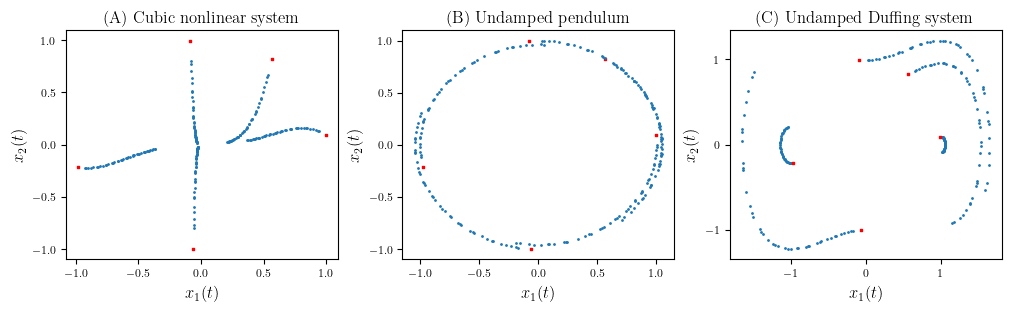

In [5]:
# Generate a data of irregular sampling time
base_config["params_synthetic_data"]["randomness"] = "Irregular"
irregular_observation_cubic = generate_synthetic_data(dynamics=Cubic_Nonlinear_2D_ODE, params = base_config["params_synthetic_data"])
irregular_observation_pendulum = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])
irregular_observation_duffing = generate_synthetic_data(dynamics=Duffing_System, params = base_config["params_synthetic_data"])

observation_list = [irregular_observation_cubic[0], irregular_observation_pendulum[0], irregular_observation_duffing[0]]
fig_label = ["(A) Cubic nonlinear system","(B) Undamped pendulum"," (C) Undamped Duffing system"]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3),constrained_layout=True)
for i, ax in enumerate(axes.flat): # axes.flat allows iteration over a flattened 2D array of axes:
    temp_data = observation_list[i]
    for num in range(base_config["params_synthetic_data"]['NUM_TRAJECTORY']):
        ax.scatter(x=temp_data[num][:,0], y=temp_data[num][:,1], s=1, c="tab:blue", alpha=1)
        ax.scatter(temp_data[num][0,0],temp_data[num][0,1], s=3, color='red', marker="s")
        ax.locator_params(axis='x', nbins=5)  # Specify 4 ticks on the x-axis
        ax.locator_params(axis='y', nbins=5)  # Specify 5 ticks on the y-axis
        ax.set_title(f"{fig_label[i]}",fontsize=12)
        ax.set_xlabel("$x_1(t)$", fontsize=12)
        ax.set_ylabel("$x_2(t)$", fontsize=12)

# Manually define legend handles with markers
line1 = mlines.Line2D([], [], color='tab:blue', marker='o', label='Observations', linestyle='None')
line2 = mlines.Line2D([], [], color='red', marker='s', label='Initial states', linestyle='None')

# Add a single shared legend
#fig.legend(handles=[line1, line2], bbox_to_anchor=(0.5, 1),loc='center',ncol=2, fontsize=10) 
plt.savefig("PP_viz.png", dpi=300, bbox_inches='tight')
plt.show()

### Unwrapped preprocessing function and optimization process

In [6]:
import pysindy as ps # import pysindy package to validate the preprocessing procedure

In [7]:
base_config["params_synthetic_data"]["randomness"] = True
observation_pendulum = generate_synthetic_data(dynamics=Pendulum, params = base_config["params_synthetic_data"])
libraries = []
libraries.append(ps.PolynomialLibrary(degree=4, include_bias=False))
libraries.append(ps.FourierLibrary(n_frequencies=1, include_sin=True, include_cos=True))
observables_function = ps.ConcatLibrary(libraries)

current_observable_list, one_step_forward_observable_list, time_diff_list = [], [], []

for i in range(5):
    temp_observable = observables_function.fit_transform(observation_pendulum[0][i])
    current_observable_list.append(temp_observable[:-1])
    one_step_forward_observable_list.append(temp_observable[1:])
    time_diff_list.append(np.diff(observation_pendulum[1][i]))

current_observable = np.concatenate(current_observable_list, axis=0)
one_step_forward_observable = np.concatenate(one_step_forward_observable_list, axis=0)
observation_time_diff = np.concatenate(time_diff_list, axis=0)

print(current_observable.shape, one_step_forward_observable.shape, observation_time_diff.shape)

(96, 18) (96, 18) (96,)


Example: Searching a true eigen-pair with partial minimization approach.

In [8]:
loss_function = construct_loss_function(current_observable,one_step_forward_observable,observation_time_diff)
coefficient_ls = []
eigenvalue_ls =[1e-4, 5.060000e-05, 1e-6, 1e-7, 0]
for mu in eigenvalue_ls:
    cov_matrix = loss_function(mu)
    coefficient_ls.append(np.round(partial_minimization_in_eigenfunction(cov_matrix)[1],3))
terms = observables_function.get_feature_names(["x_1","x_2"])
terms = [f"${term}(t)$"for term in terms]
learned_function_dataframe = pd.DataFrame(np.stack(coefficient_ls, axis=0), index=eigenvalue_ls, columns=terms,dtype=float)
# Identify columns where all values are close to zero
cols_to_drop = [col for col in learned_function_dataframe.columns[:] if np.all(np.isclose(learned_function_dataframe[col], 0, atol=10**-8))]

# Drop those columns
learned_function_dataframe = learned_function_dataframe.drop(columns=cols_to_drop)
print(learned_function_dataframe.to_latex(index=True, escape=False, caption='tb')) 

\begin{table}
\caption{tb}
\begin{tabular}{lrrrrrrr}
\toprule
 & $x_1^2(t)$ & $x_2^2(t)$ & $x_1^4(t)$ & $x_1^2 x_2^2(t)$ & $x_2^4(t)$ & $cos(1 x_1)(t)$ & $cos(1 x_2)(t)$ \\
\midrule
0.000100 & 0.095000 & 0.605000 & -0.003000 & 0.012000 & -0.005000 & -0.738000 & 0.283000 \\
0.000051 & 0.096000 & 0.605000 & -0.003000 & 0.012000 & -0.005000 & -0.738000 & 0.282000 \\
0.000001 & -0.000000 & -0.448000 & -0.000000 & -0.000000 & -0.000000 & 0.894000 & -0.002000 \\
0.000000 & 0.000000 & -0.447000 & -0.000000 & 0.000000 & -0.000000 & 0.895000 & 0.001000 \\
0.000000 & -0.000000 & -0.447000 & 0.000000 & -0.000000 & 0.000000 & 0.894000 & -0.000000 \\
\bottomrule
\end{tabular}
\end{table}

